In [ ]:
# use this notebook to generate graphs for training runs

from google.colab import drive
ROOT = "/content/drive"
drive.mount(ROOT)
%cd drive/'My Drive'/CORL

Mounted at /content/drive
/content/drive/My Drive/CORL


In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pickle

def unzip_it(zipped):
    return list(zip(*list(zipped)))

# readies history for printing
# if multiple, then assumes pipe and concats them
def process(*lists):
    time = []
    avg = []
    time0 = 0
    for lst in lists:
        lst = unzip_it(lst)
        if lst[1][-1] > 20:
            time += [t/3600+time0 for t in lst[1]]
        else:
            time += [t+time0 for t in lst[1]]
        avg += list(lst[0])
        time0 = time[-1]
    return [time, avg]

# l2i
#l2i = pickle.load( open( "models/l2i/att_start_12_1hr.pickle", "rb" ) )

# evo
#l2i_evo = pickle.load( open( "models/l2i_evo/att_evo_start_12_1hr.pickle", "rb" ) )

# attention
att = pickle.load( open( "models/att/hist_vrp100_rollout_20201022T224503_5hr.pickle", "rb" ) )

# evolution
evo = pickle.load( open( "models/att_evo/fitness_history_1.pickle", "rb" ) )

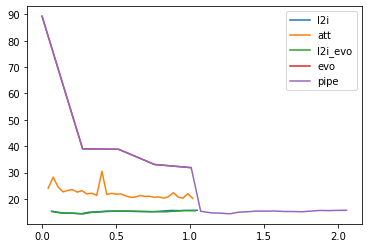

In [ ]:
lines = [process(l2i), process(att), process(l2i_evo), process(evo), process(evo, l2i)]
labels = ['l2i', "att", 'l2i_evo', "evo", "pipe"]
for i, line in enumerate(lines):
    plt.plot(line[0], line[1], label=labels[i])
plt.legend()